# 11. Fourier Series I

With Taylor we saw that **every** function could be well approximated by a polynomial. We derived one important practical tool, Newton's Method, from this insight.

With Euler we now show that **every** function can be built of with pure sines and cosines.

Our application will be to sound recordings over an interval of T seconds. To begin let's consider the sequence

$$
  s_n(t) \equiv \sin(2\pi n t/T), \hskip 0.25in t\in[0,T], \hskip 0.25in n=1,2,3,\ldots
$$

of pure sine waves.

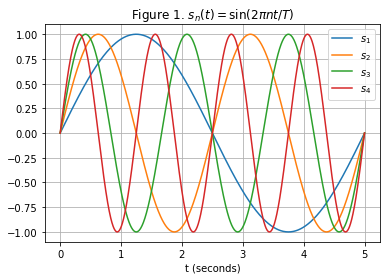

In [1]:
# plot a few pure sine waves
import numpy as np
import matplotlib.pyplot as plt

T = 5   # seconds
t = np.linspace(0,T,1000)

for n in range(1,5):
    sn = np.sin(2*np.pi*n*t/T)
    plt.plot(t,sn)
    
plt.grid('on')
plt.xlabel('t (seconds)')
plt.legend(['$s_1$','$s_2$','$s_3$','$s_4$'])
plt.title('Figure 1. $s_n(t)=\\sin(2\pi n t/T)$');

We see that the **frequency** of $s_n$, in cycles per second, or Hz, is $n/T$.

Let's see what we can build with these functions.

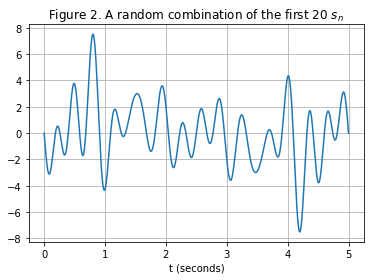

In [2]:
# random combination of pure tones

f = np.zeros(t.shape)
for n in range(1,20):
    sn = np.sin(2*np.pi*n*t/T)
    bn = np.random.randn()
    f = f + bn*sn
    
plt.plot(t, f)
plt.grid('on')
plt.xlabel('t (seconds)')
plt.title('Figure 2. A random combination of the first 20 $s_n$');

After re-running that cell several times we suspect that yes, we can likely build up most any (odd) function we wish.

The challenge, and reward, of **Fourier Analysis** is that it solve the reverse problem: given a signal it tells us the multiples, $b_n$, of the $s_n$. These multiples are seen as the **signature** of the signal.

To see how this works we suppose that we are given the value of a signal, $f(t)$, for each $t$ in some interval $[0,T]$.
We then optimistically write $f$ as a combination of N pure sine waves.

$$
  f(t) = \sum_{n=1}^N b_n\sin(2\pi n t/T) \tag{FSs}
$$

and seek out the individual multiples, $b_n$. The secret to finding these $b_n$ lies in Figure 1. Do you see that $s_2$ has one full period in each "lobe" of $s_1$ and that this translates into

$$
  \int_0^T s_1(t)s_2(t)\,dt = 0.  \tag{O12}
$$

In the same vein, $s_3$ has two ups in one down in the up lobe of $s_1$, and two downs and one up in the down lobe of $s_1$. These contributions perfectly balance and so

$$
  \int_0^T s_1(t)s_3(t)\,dt = 0,  \tag{O13}
$$

as well. In fact, if $m\ne n$, then

$$
  \boxed{\int_0^T s_m(t)s_n(t)\,dt = 0.}  \tag{Omn}
$$

while if $m=n$ then

$$
  \boxed{\int_0^T s_n^2(t)\,dt = \int_0^T \sin^2(2\pi nt/T)\,dt = \frac{1}{2}\int_0^T (1-\cos(4\pi nt/T))\,dt = T/2.}
    \tag{Onn}
$$

With these two boxes in hand we return to (FSs), multiply both sides by $s_1$ and integrate and find

$$
  \int_0^T f(t)\sin(2\pi t/T)\,dt = \sum_{n=1}^N b_n\int_0^T \sin(2\pi n t/T)\sin(2\pi t/T)\,dt
    = b_1\int_0^T \sin^2(2\pi t/T)\,dt = b_1 T/2
$$

so

$$
  b_1 = \frac{2}{T}\int_0^T f(t)\sin(2\pi t/T)\,dt.
$$

In order to get $b_2$ we multiply both sides of (FSs) by $s_2$ and integrate and find

$$
  b_2 = \frac{2}{T}\int_0^T f(t)\sin(4\pi t/T)\,dt.
$$

Do you see the pattern?

$$
  \boxed{b_n = \frac{2}{T}\int_0^T f(t)\sin(2n\pi t/T)\,dt.}
$$

Let's put this into practice on the test signal

$$
  f(t) = T/2 - t
$$


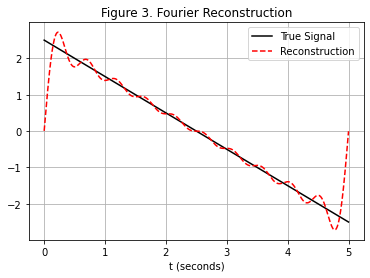

In [3]:
# Fourier Reconstruction

T = 5
Nt = 10000
dt = T/Nt
t = np.arange(dt/2,T,dt)
f = T/2 - t

plt.plot(t, f, 'k')

frecon = np.zeros(t.shape)

N = 10 # number of Fourier weights

for n in range(1,N+1):
    sn = np.sin(2*np.pi*n*t/T)
    bn = (2/T) * sum(f*sn)*dt
    frecon = frecon + bn*sn
    
plt.plot(t, frecon, 'r--')
plt.grid('on')
plt.xlabel('t (seconds)')
plt.legend(['True Signal','Reconstruction'])
plt.title('Figure 3. Fourier Reconstruction');

This "looks" OK, except for near the ends. With a little extra work we can also plot each weight, $b_n$, at its associated frequency, $f_n = n/T$.

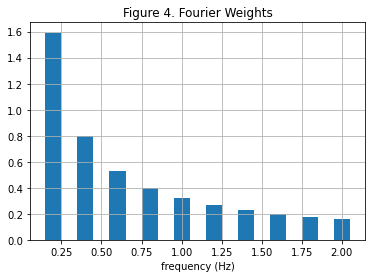

In [4]:
# Fourier Weights

b = np.zeros(N,)
freq = np.zeros(N,)

for n in range(1,N+1):
    sn = np.sin(2*np.pi*n*t/T)
    b[n-1] = (2/T) * sum(f*sn)*dt
    freq[n-1] = n/T

plt.bar(freq,b,width=0.1)
plt.grid('on')
plt.xlabel('frequency (Hz)')
plt.title('Figure 4. Fourier Weights');

Please explore, lots of other signals, e.g.,

$$
  f(t) = (T/2-t)(t(T-t)/T)^8
$$

This has better end behavior (because, like $s_n$, it vanishes at both ends) and requires only a few terms to get a good fit. 

Something seemingly simpler, like

$$
  f(t) = (T/2-t)t/T
$$

does not come close to being fit by the $s_n$. The issue here is that $f$, unlike each of the $s_n$ is not odd about $T/2$.

To remedy that we need only bring on the cosines,

$$
  c_n(t) \equiv \cos(2\pi nt/T),
$$

and so generalize the Fourier Series of sines (FSs) to

$$
  \boxed{f(t) = a_0c_0 + \sum_{n=1}^N (a_n\cos(2\pi nt/T) + b_n\sin(2\pi nt/T))} \tag{FS}
$$

Let's first take a look at the first 4 $c_n$. We note right away that $c_0(t)=1$.

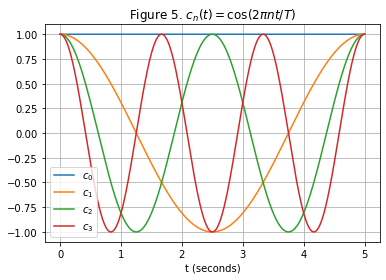

In [5]:
# the first few pure cosines

for n in range(4):
    cn = np.cos(2*np.pi*n*t/T)
    plt.plot(t,cn)
    
plt.grid('on')
plt.xlabel('t (seconds)')
plt.legend(['$c_0$','$c_1$','$c_2$','$c_3$'])
plt.title('Figure 5. $c_n(t)=\\cos(2\pi n t/T)$');

Our previous work on finding the $b_n$ remains true, because each of the products, $c_ms_n$, integrates to 0. You can see the symmetry in figures 1 and 5. More generally, each $s_n$ is odd (about T/2), i.e.,

$$
  s_n(t) = -s_n(T-t), \hskip 0.25in 0<t<T/2 \tag{odd}
$$

while each $c_n$ is even (about T/2), i.e.,

$$
  c_n(t) = c_n(T-t), \hskip 0.25in 0<t<T/2. \tag{even}
$$ 

If we further note that odd times even is odd and that odd functions integrate to 0 over intervals symmetric about their midpoint, we find

$$
  \int_0^T c_m(t)s_n(t)\,dt = 0
$$

for every possible $m$ and $n$. With this, you may not be surprised that

$$
  \int_0^T c_0^2(t)\,dt = T \hskip 0.25in \hbox{and}\hskip 0.25in \int_0^T c_n^2(t)\,dt = T/2 \hskip 0.25in\ n=1,2,3,\ldots
$$

and so

$$
  a_0 = \frac{1}{T}\int_0^T f(t)\,dt \hskip 0.25in \hbox{and}\hskip 0.25in a_n = \frac{2}{T}\int_0^T f(t)c_n(t)\,dt  \hskip 0.25in\ n=1,2,3,\ldots
$$

With this we can now find the Fourier Series of ANY function

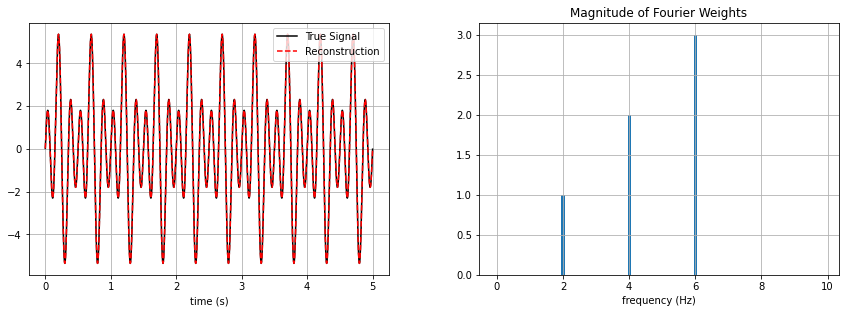

In [16]:
# The full Fourier Series of the user prescribed signal

T = 5  # time window
Nt = 10000
dt = T/Nt
t = np.arange(dt/2,T,dt)
f = np.sin(2*10*np.pi*t/T) - 2*np.sin(2*20*np.pi*t/T) + 3*np.sin(2*30*np.pi*t/T)

N = 50  # number of tones to explore - this will take us to a max frequency N/T
a = np.zeros(N,)
b = np.zeros(N,)
mag = np.zeros(N,)
freq = np.zeros(N,)

a[0] = (1/T)*sum(f)*dt
frecon = a[0]*np.ones(t.shape)
mag[0] = abs(a[0])

for n in range(1,N):
    cn = np.cos(2*np.pi*n*t/T)
    a[n] = (2/T) * sum(f*cn)*dt
    sn = np.sin(2*np.pi*n*t/T)
    b[n] = (2/T) * sum(f*sn)*dt
    frecon = frecon + a[n]*cn + b[n]*sn
    freq[n] = n/T
    mag[n] = np.sqrt(a[n]**2+b[n]**2)
    
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(right=2, top=1, wspace=0.25)

ax1.plot(t, f, 'k')
ax1.plot(t, frecon, 'r--')
ax1.grid('on')
ax1.set_xlabel('time (s)')
ax1.legend(['True Signal','Reconstruction'])
#ax1.set_title('')

ax2.bar(freq,mag,width=0.1)
ax2.grid('on')
ax2.set_xlabel('frequency (Hz)')
ax2.set_title('Magnitude of Fourier Weights');

### Homework 11.

1. Run the cell above, computing the full Fourier Series with $T=5$, for

$$
  f(t) = \sin(40\pi t/T) + 3\cos(60\pi t/T)
$$

and **explain** the heights and frequencies displayed in the bar plot.

2. Show that $s_n$ and $c_n$ are respectively odd and even, i.e., show (in markdown only) that

$$
  s_n(t) = -s_n(T-t), \hskip 0.25in 0<t<T/2
$$

and

$$
  c_n(t) = c_n(T-t), \hskip 0.25in 0<t<T/2.
$$

Hint: sico+sico and coco-sis

3. Carefully deduce (in markdown, via coco-sisi and pythagoras) that

$$
  \int_0^T\sin^2(2n\pi t/T)\,dt = \int_0^T\cos^2(2n\pi t/T)\,dt = T/2
$$

for each $n=1,2,3,\ldots$. Hint: $\cos(2a)=\cos(a+a)=\cos^2(a)-\sin^2(a) = \cos^2(a) + \cos^2(a) -1 = 2\cos^2(a) - 1$ so

$$
  \cos^2(a) = \frac{1+\cos(2a)}{2}
$$

